In [1]:
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)

print(f"The Dimension of the data is - {df.shape}")

The Dimension of the data is - (178, 14)


In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [5]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [6]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [8]:
print("Size of X: {}".format(X.shape))
print("Size of Y: {}".format(Y.shape))

Size of X: (178, 13)
Size of Y: (178,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [10]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (142, 13)
Size of X_test: (36, 13)
Size of Y_train: (142,)
Size of Y_test: (36,)


In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [12]:
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [13]:
X_test

array([[ 9.38847070e-01, -6.32166068e-01, -4.35010303e-01,
        -9.19695615e-01,  1.26324041e+00,  5.59998633e-01,
         9.77754158e-01, -1.20637533e+00,  2.36680192e-02,
         3.39284695e-01, -1.45574805e-01,  8.52295413e-01,
         1.04940526e+00],
       [-2.42263344e-01,  2.67579163e-01,  4.20859365e-01,
         7.12764102e-01,  8.40672358e-01, -1.27747161e+00,
        -6.05828120e-01, -9.70634096e-01, -5.87397203e-01,
         2.42611713e+00, -2.06608025e+00, -1.55017035e+00,
        -8.66598582e-01],
       [-7.64438475e-01, -1.11802849e+00, -7.69915825e-01,
        -1.61767889e-01, -9.20027861e-01,  2.03653722e+00,
         1.18341419e+00, -1.36353615e+00,  4.48018868e-01,
        -2.50930538e-01,  1.16386073e+00,  3.94021597e-01,
        -1.06480588e+00],
       [ 7.15057728e-01, -5.78181354e-01,  3.46435916e-01,
         2.75498106e-01,  1.12238439e+00,  1.15061407e+00,
         8.54358136e-01, -1.28495574e+00,  1.43251284e+00,
         5.07917619e-01,  1.16312302e

In [14]:
kpca = KernelPCA(n_components = 2,
                 kernel = 'rbf',
                 random_state = 42)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [15]:
X_train

array([[ 0.46540697, -0.23434556],
       [ 0.28634907,  0.30478225],
       [-0.12087501,  0.42663032],
       [ 0.57159263, -0.37316625],
       [-0.43039305,  0.07809796],
       [-0.44459221, -0.24595665],
       [-0.11432031,  0.50518271],
       [ 0.07099744,  0.48515601],
       [ 0.05246047,  0.51561154],
       [-0.44388392, -0.2020732 ],
       [ 0.51046787, -0.16345162],
       [-0.24377084,  0.21478452],
       [ 0.39119987, -0.22116164],
       [-0.4506256 , -0.35935991],
       [ 0.43734173, -0.11969387],
       [ 0.54556552, -0.18719483],
       [-0.50029209, -0.20833233],
       [ 0.10854094, -0.16990509],
       [-0.55629186, -0.09500493],
       [-0.00540376,  0.53316736],
       [ 0.43495067, -0.37232317],
       [ 0.50089353, -0.17762903],
       [-0.16748775,  0.13036677],
       [ 0.52942286, -0.15694334],
       [ 0.51104775, -0.36377716],
       [-0.34809893,  0.00517757],
       [ 0.44901155, -0.03030262],
       [ 0.3578409 ,  0.02884606],
       [-0.13740548,

In [16]:
X_test

array([[-0.50500756, -0.23228077],
       [ 0.35429416, -0.2631939 ],
       [-0.21823456,  0.27511687],
       [-0.50305716, -0.26908129],
       [ 0.04303105,  0.0853434 ],
       [-0.00064367, -0.0159459 ],
       [-0.44088058, -0.27972777],
       [ 0.52582875, -0.23155159],
       [ 0.03930226,  0.58072864],
       [ 0.19897567,  0.45560719],
       [ 0.42914122, -0.0945586 ],
       [ 0.38611867, -0.21046817],
       [-0.53628002, -0.40613552],
       [-0.27419049,  0.17810077],
       [ 0.42062163, -0.31023692],
       [-0.06060217,  0.54317922],
       [-0.28063932, -0.21239631],
       [-0.39734941, -0.34329535],
       [ 0.26599301,  0.1199371 ],
       [-0.54877258, -0.24761708],
       [-0.17485354,  0.15336439],
       [-0.37759921,  0.00276639],
       [-0.2468222 , -0.06955059],
       [-0.09228721,  0.54649448],
       [ 0.1558697 ,  0.13269712],
       [ 0.01543129,  0.52138858],
       [-0.02735119,  0.38132781],
       [ 0.10803145,  0.5126705 ],
       [ 0.14103569,

In [17]:
classifier = LogisticRegression(verbose = 1,
                                random_state = 42,
                                n_jobs = -1)
classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(n_jobs=-1, random_state=42, verbose=1)

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [19]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [20]:
acc = accuracy_score(Y_test, y_pred)
print(f"The accuracy of the model is - {acc*100:.3f}%")

The accuracy of the model is - 100.000%


In [21]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



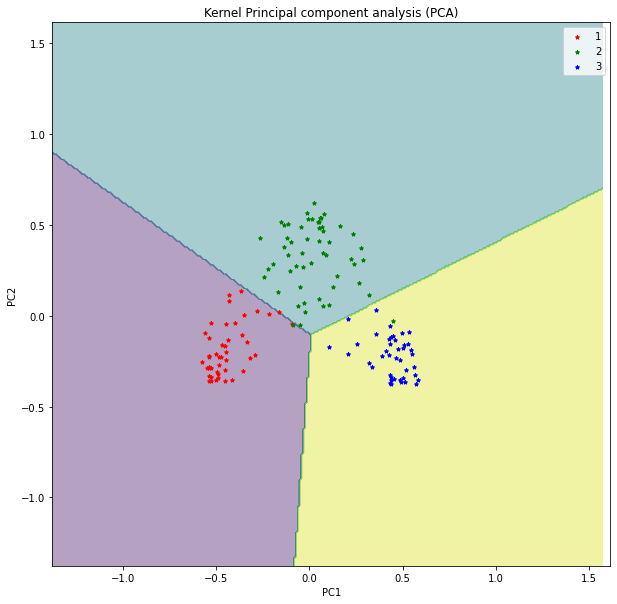

In [22]:
# Visualizing the Training Set Results

figure = plt.figure(figsize = (10,10))

x_set, y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1,
                               step = 0.01))

plt.contourf(X1,
             X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             camp = ListedColormap(('red', 'green', 'blue')),
             alpha = 0.4
            )

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i),
                label = j,
                s = 15,
                marker = '*'
               )
    
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
plt.title('Kernel Principal component analysis (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

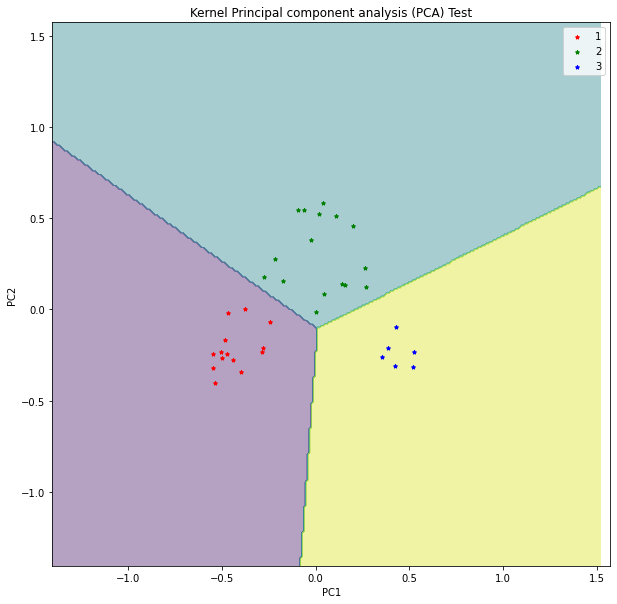

In [23]:
# Visualizing the Test Set Results

figure = plt.figure(figsize = (10,10))

x_set, y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1,
                               step = 0.01))

plt.contourf(X1,
             X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             camp = ListedColormap(('red', 'green', 'blue')),
             alpha = 0.4
            )

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i),
                label = j,
                s = 15,
                marker = '*'
               )
    
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
plt.title('Kernel Principal component analysis (PCA) Test')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()